# Installs

In [1]:
!pip install OpenAI

  Obtaining dependency information for OpenAI from https://files.pythonhosted.org/packages/55/4c/906b5b32c4c01402ac3b4c3fc28f601443ac5c6f13c84a95dd178c8d545d/openai-1.52.2-py3-none-any.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/56/95/9377bcb415797e44274b51d46e3249eba641711cf3348050f76ee7b15ffc/httpx-0.27.2-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/packages/91/35/85ef9eaef7dec14f28dd9b8a2116c07075bb2731a405b650a55fda4c74d7/jiter-0.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions<5,>=4.11 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8

# Wordcloud Clinical notes

In [16]:
# Standard library imports
import os
import re

# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# openAI API library
from openai import OpenAI

# NLTK imports
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Download required NLTK data files (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Read files into a Data Frame

In [3]:
# Read files
notes = []
for file in os.listdir('data'):
    with open("data/"+file, "r" )as file:
        notes.append(file.read())
        
# Placeholder replacement
def replace_placeholders(text, placeholder="___", replacement="None"):
    return text.replace(placeholder, replacement)

# Extracting key information using regex
def extract_information(text):
    info = {}
    patterns = {
        "Name": r"Name:\s+(.*?)\s+Unit No",
        "Unit No": r"Unit No:\s+(.*?)\n",
        "Admission Date": r"Admission Date:\s+(.*?)\s+Discharge Date",
        "Discharge Date": r"Discharge Date:\s+(.*?)\n",
        "Date of Birth": r"Date of Birth:\s+(.*?)\s+Sex",
        "Sex": r"Sex:\s+(\w)",
        "Service": r"Service:\s+(.*?)\n",
        "Allergies": r"Allergies:\s+(.*?)\n",
        "Chief Complaint": r"Chief Complaint:\n(.*?)\n",
        "Major Surgical or Invasive Procedure": r"Major Surgical or Invasive Procedure:\n(.*?)\n",
        "History of Present Illness": r"History of Present Illness:\n(.*?)\n\n",
        "Review of systems": r"Review of systems:\s+(.*?)\n\n",
        "Past Medical History": r"Past Medical History:\n(.*?)\n\n",
        "Social History": r"Social History:\n(.*?)\n",
        "Family History": r"Family History:\n(.*?)\n\n",
        "Physical Exam": r"Physical Exam:\n(.*?)\n\n",
        "Brief Hospital Course": r"Brief Hospital Course:\n(.*?)\n\n",
        "Discharge Diagnosis": r"Discharge Diagnosis:\n(.*?)\n\n",
        "Discharge Condition": r"Discharge Condition:\n(.*?)\n\n",
        "Discharge Instructions": r"Discharge Instructions:\n(.*?)\n\n",
    }
    
    for key, pattern in patterns.items():
        match = re.search(pattern, text, re.DOTALL)
        info[key] = match.group(1).strip() if match else "None"
        
    return info
def structure_data(clinical_text):
    # Replace placeholders in the clinical text
    processed_text = replace_placeholders(clinical_text)

    # Extract information into a dictionary
    return extract_information(processed_text)

structure_notes = [ structure_data(note) for note in notes]


# Null values treatment

In [4]:
df = pd.DataFrame(structure_notes).replace('None',np.NaN)
df.head(3)

,Name,Unit No,Admission Date,Discharge Date,Date of Birth,Sex,Service,Allergies,Chief Complaint,Major Surgical or Invasive Procedure,History of Present Illness,Review of systems,Past Medical History,Social History,Family History,Physical Exam,Brief Hospital Course,Discharge Diagnosis,Discharge Condition,Discharge Instructions
0,NaN,NaN,NaN,NaN,NaN,F,MEDICINE,Codeine,I feel shaky,NaN,Pt is a None year old woman who presents to ED...,(+) Per HPI. Also notes recent weight gain whi...,"-IDDM c/b retinopathy\n-HTN\n-AFib, diagnosed ...",NaN,"- 6 children, one daughter died last year from...",FEX ON ADMISSION\nVitals: T: 98.4 BP: 176/96 P...,None year old woman with IDDM and AFib on coum...,Lactic acidosis\nHyperglycemia\nUrinary tract ...,Mental Status: Clear and coherent.\nLevel of C...,"Dear Ms. None,"
1,NaN,NaN,NaN,NaN,NaN,M,MEDICINE,Demerol,Dyspnea,Bronchoscopy,This is an None yo M with history of mild deme...,NaN,gastroesophageal reflux disease\nhypercholeste...,NaN,"strong family history of diabetes mellitus, an...","VS: T 98.6max, 97.3current, BP None, HR 79 RR ...",None year old male with complaints of dyspnea...,Lung mass\nAcute renal failure\nHypoxia,"Stable, for home with services.",You were admitted to the hospital because of y...
2,NaN,NaN,NaN,NaN,NaN,F,ORTHOPAEDICS,No Known Allergies / Adverse Drug Reactions,RLE pain,Right short trochanteric fixation nail,"None, blown over by gust of wind w/R ITFx now ...",NaN,MedHx:\n-HTN\n-Hypercholesterolemia\n-Eczema\n...,NaN,"Mother deceased with HTN, CAD. Father deceased...",NaN,The patient presented to the emergency departm...,right intertrochanteric femur fracture,"AAOx3, mentating appropriately, NVI","Weigh yourself every morning, call MD if weigh..."


In [5]:
df.isnull().sum()

Name                                    475
Unit No                                 500
Admission Date                          500
Discharge Date                          500
Date of Birth                           500
Sex                                       0
Service                                   0
Allergies                                 6
Chief Complaint                          18
Major Surgical or Invasive Procedure    165
History of Present Illness               11
Review of systems                       487
Past Medical History                     12
Social History                          487
Family History                           17
Physical Exam                            28
Brief Hospital Course                    60
Discharge Diagnosis                      34
Discharge Condition                      17
Discharge Instructions                   93
dtype: int64

In [6]:
#Select columns with less that 50 null values
df_column_selected = df[df.isnull().sum()[df.isnull().sum()<50].index]
#drop the lines that still have null vaules
df_treated = df_column_selected.dropna(axis=0)

# Complete yourself

In [7]:
discharged_diagnosis = ' '.join(df_treated['Discharge Diagnosis'].to_list()).replace('\n',' ')

In [8]:

# Function to clean individual lines
def clean_line(line):
    # Remove HTML-like tags
    line = re.sub(r'<.*?>', '', line)
    # Remove unwanted characters (e.g., non-ASCII characters)
    line = re.sub(r'[^\x00-\x7F]+', '', line)
    # Strip leading/trailing whitespace
    return line.strip()

def speaking_text_cleaner(speaking_text):
    # Process each line to clean it
    cleaned_lines = []
    for line in speaking_text.splitlines():
        cleaned_line = clean_line(line)
        if cleaned_line:  # Only add non-empty lines
            cleaned_lines.append(cleaned_line)
    return "\n".join(cleaned_lines)

cleaned_discharged_diagnosis = speaking_text_cleaner(discharged_diagnosis)

In [9]:
def corpus_cleaner(cleaned_text,n_min = 4 ):
    n_min = 4                                                           # Minimum number of characters. 
    corpus = []
    lemmatizer = WordNetLemmatizer()

    pre = re.sub(r'\W', ' ', cleaned_text)                          # Substitute the non-alphanumerics character by space. 
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.                                      # Exercise
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.                                 # Exercise
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.
    return corpus

In [10]:
corpus_clean  = corpus_cleaner( cleaned_discharged_diagnosis )

In [ ]:
remove_words = ['primary','secondary','going','diagnosis','right']
treated_corpus = [x for x in corpus_clean if x not in remove_words]

# Count the words

<Axes: >

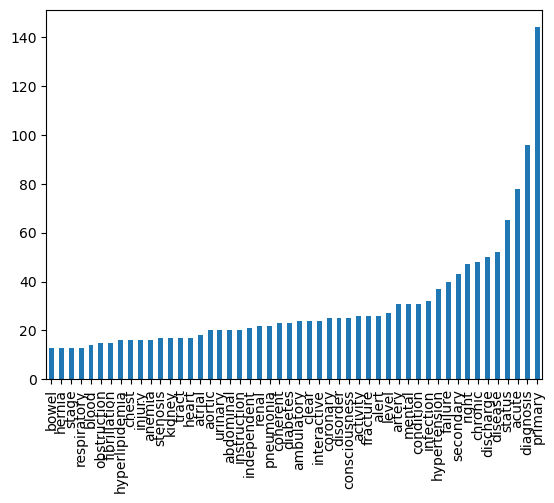

In [26]:
from collections import Counter
pd.Series(Counter(corpus_clean)).sort_values()[-50:].plot(kind='bar')

# Word Cloud

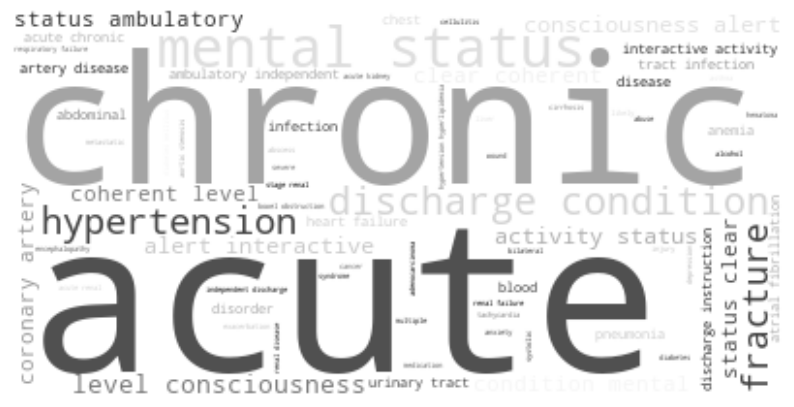

In [17]:
a_long_sentence = ' '.join(treated_corpus)
wc = WordCloud(background_color='white', max_words=70,colormap='gist_gray')                  # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words.                                                         
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.savefig('clinical_notes.png',bbox_inches='tight')
plt.show()

# Use a transformer

In [ ]:
"""
"Name": r"Name:\s+(.*?)\s+Unit No",
        "Unit No": r"Unit No:\s+(.*?)\n",
        "Admission Date": r"Admission Date:\s+(.*?)\s+Discharge Date",
        "Discharge Date": r"Discharge Date:\s+(.*?)\n",
        "Date of Birth": r"Date of Birth:\s+(.*?)\s+Sex",
        "Sex": r"Sex:\s+(\w)",
        "Service": r"Service:\s+(.*?)\n",
        "Allergies": r"Allergies:\s+(.*?)\n",
        "Chief Complaint": r"Chief Complaint:\n(.*?)\n",
        "Major Surgical or Invasive Procedure": r"Major Surgical or Invasive Procedure:\n(.*?)\n",
        "History of Present Illness": r"History of Present Illness:\n(.*?)\n\n",
        "Review of systems": r"Review of systems:\s+(.*?)\n\n",
        "Past Medical History": r"Past Medical History:\n(.*?)\n\n",
        "Social History": r"Social History:\n(.*?)\n",
        "Family History": r"Family History:\n(.*?)\n\n",
        "Physical Exam": r"Physical Exam:\n(.*?)\n\n",
        "Brief Hospital Course": r"Brief Hospital Course:\n(.*?)\n\n",
        "Discharge Diagnosis": r"Discharge Diagnosis:\n(.*?)\n\n",
        "Discharge Condition": r"Discharge Condition:\n(.*?)\n\n",
        "Discharge Instructions":
        """.split

In [27]:
client = OpenAI(api_key=??? )

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "you are a helpfull doctor"},
    {"role": "user", "content": """can you crea"Name": r"Name:\s+(.*?)\s+Unit No",
        "Unit No":",
        "Admission Date": ",
        "Discharge Date": ",
        "Date of Birth": ",
        "Sex": ",
        "Service": ",
        "Allergies": ",
        "Chief Complaint":",
        "Major Surgical or Invasive Procedure": ",
        "History of Present Illness": ",
        "Review of systems": ",
        "Past Medical History":",
        "Social History": ",
        "Family History":",
        "Physical Exam": ",
        "Brief Hospital Course": ",
        "Discharge Diagnosis":",
        "Discharge Condition": ",
        "Discharge Instructions":,
        "Diagnostic": after that create me a diagnostic
     """}
  ]
)

In [ ]:
print(completion.choices[0].message.content)